In [3]:
#download repo
!git clone https://github.com/jmsaavedrar/machine_learning


Cloning into 'machine_learning'...
remote: Enumerating objects: 509, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (117/117), done.
remote: Total 509 (delta 97), reused 90 (delta 51), pack-reused 338 (from 1)
Receiving objects: 100% (509/509), 8.02 MiB | 20.03 MiB/s, done.
Resolving deltas: 100% (254/254), done.


In [4]:
#download model
!wget "https://www.dropbox.com/scl/fi/jj8eg7sm15v92mlrsipnl/model_mnist_full?rlkey=oelyco80rr00ct9e9wet331ub&st=lecctcbl&dl=0" -O model_mnist_full

--2025-05-30 19:37:29--  https://www.dropbox.com/scl/fi/jj8eg7sm15v92mlrsipnl/model_mnist_full?rlkey=oelyco80rr00ct9e9wet331ub&st=lecctcbl&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc127d40bf2772ef12525825c623.dl.dropboxusercontent.com/cd/0/inline/CqoA7nUp6L0l6Vu0W3MzkLcR7-qlQiCpaodyvbtI_kKHEFq7N3Af_KIgEVC4tg5ABbZ0GMwWAxE4Z0xlEQLtVpydTrA3ftnZg8iJ2lgZr-LWCIbaZAN3_j8CS19mE1RQDng/file# [following]
--2025-05-30 19:37:29--  https://uc127d40bf2772ef12525825c623.dl.dropboxusercontent.com/cd/0/inline/CqoA7nUp6L0l6Vu0W3MzkLcR7-qlQiCpaodyvbtI_kKHEFq7N3Af_KIgEVC4tg5ABbZ0GMwWAxE4Z0xlEQLtVpydTrA3ftnZg8iJ2lgZr-LWCIbaZAN3_j8CS19mE1RQDng/file
Resolving uc127d40bf2772ef12525825c623.dl.dropboxusercontent.com (uc127d40bf2772ef12525825c623.dl.dropboxusercontent.com)... 162.125.4.15, 2620:100:601c:15::a27d:60f


In [5]:
#download data
!wget  "https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj&st=1c4aqapo" -O  MNIST-5000.zip

--2025-05-30 19:37:35--  https://www.dropbox.com/scl/fi/tvrvsl2nd7e1upcmazgm1/MNIST-5000.zip?rlkey=j5a7rauyg83p0x6ybltev9pgj&st=1c4aqapo
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdeb0162ac9f620c261a0f2b46c.dl.dropboxusercontent.com/cd/0/inline/Cqo-g9m0LKqfUq2dmAB6d5RxiWq7FYe7U98r2q578cAapMCVCHwiFmhW-vqGH2FJM73zIFm1nNL3kEfuPfv4hoXjhyaFYQgZdxnHGWGoBZAVOiVBuwFDeIWDPIInmsj_R4UNHKzlqgROuGlsmeIV-vcw/file# [following]
--2025-05-30 19:37:35--  https://ucdeb0162ac9f620c261a0f2b46c.dl.dropboxusercontent.com/cd/0/inline/Cqo-g9m0LKqfUq2dmAB6d5RxiWq7FYe7U98r2q578cAapMCVCHwiFmhW-vqGH2FJM73zIFm1nNL3kEfuPfv4hoXjhyaFYQgZdxnHGWGoBZAVOiVBuwFDeIWDPIInmsj_R4UNHKzlqgROuGlsmeIV-vcw/file
Resolving ucdeb0162ac9f620c261a0f2b46c.dl.dropboxusercontent.com (ucdeb0162ac9f620c261a0f2b46c.dl.dropboxusercontent.com)... 162.12

In [9]:
!unzip MNIST-5000.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: MNIST-5000/train_images/digit_mnist_11590_7.png  
  inflating: MNIST-5000/train_images/digit_mnist_13415_9.png  
  inflating: MNIST-5000/train_images/digit_mnist_11205_6.png  
  inflating: MNIST-5000/train_images/digit_mnist_14494_4.png  
  inflating: MNIST-5000/train_images/digit_mnist_11367_6.png  
  inflating: MNIST-5000/train_images/digit_mnist_11492_7.png  
  inflating: MNIST-5000/train_images/digit_mnist_14775_7.png  
  inflating: MNIST-5000/train_images/digit_mnist_12217_9.png  
  inflating: MNIST-5000/train_images/digit_mnist_11671_5.png  
  inflating: MNIST-5000/train_images/digit_mnist_10170_0.png  
  inflating: MNIST-5000/train_images/digit_mnist_10829_4.png  
  inflating: MNIST-5000/train_images/digit_mnist_12279_0.png  
  inflating: MNIST-5000/train_images/digit_mnist_13645_1.png  
  inflating: MNIST-5000/train_images/digit_mnist_12790_6.png  
  inflating: MNIST-5000/train_images/digit_mnist_10117_9.

In [13]:
import sys
sys.path.append('/content/machine_learning/mnist')


In [15]:
import PIL
import torch
import model
import os
import matplotlib.pyplot as plt
import numpy as np

In [12]:
!pip install torchmetrics
import torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 962.5/962.5 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [16]:
mnist_model = model.mnist_conv()
model_path = 'model_mnist_full'
mnist_model.load_state_dict(torch.load(model_path, weights_only=True, map_location=torch.device("cpu")))
mnist_model.eval()
print(mnist_model)


mnist_conv(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (mp): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (cl): Linear(in_features=128, out_features=10, bias=True)
)


In [18]:
datapath = '/content/MNIST-5000'
fvalid = os.path.join(datapath, 'valid.txt')
data = []
with open(fvalid) as f :
    for fline in f :
        iname, icl = fline.split()
        iname = os.path.join(datapath, iname)
        data.append((iname, int(icl)))
print(data)

[('/content/MNIST-5000/valid_images/digit_mnist_00131_6.png', 6), ('/content/MNIST-5000/valid_images/digit_mnist_00105_9.png', 9), ('/content/MNIST-5000/valid_images/digit_mnist_00002_2.png', 2), ('/content/MNIST-5000/valid_images/digit_mnist_00064_3.png', 3), ('/content/MNIST-5000/valid_images/digit_mnist_00187_2.png', 2), ('/content/MNIST-5000/valid_images/digit_mnist_00500_6.png', 6), ('/content/MNIST-5000/valid_images/digit_mnist_00195_0.png', 0), ('/content/MNIST-5000/valid_images/digit_mnist_00343_1.png', 1), ('/content/MNIST-5000/valid_images/digit_mnist_00279_2.png', 2), ('/content/MNIST-5000/valid_images/digit_mnist_00330_1.png', 1), ('/content/MNIST-5000/valid_images/digit_mnist_00154_5.png', 5), ('/content/MNIST-5000/valid_images/digit_mnist_00236_9.png', 9), ('/content/MNIST-5000/valid_images/digit_mnist_00369_6.png', 6), ('/content/MNIST-5000/valid_images/digit_mnist_00009_5.png', 5), ('/content/MNIST-5000/valid_images/digit_mnist_00483_7.png', 7), ('/content/MNIST-5000/va

In [20]:
def predict(fimage) :
    image = torch.Tensor(np.array(PIL.Image.open(fimage), dtype = np.float32)) / 255.0
    image = image.view([1,1,image.size()[0], image.size()[1]])
    with torch.no_grad() :
        logits = mnist_model(image)
        probs = torch.nn.Softmax(dim = 0)(logits[0]).numpy()
        cls = np.argmax(probs)
    return (cls, probs[cls])

In [21]:
result = []
for fimage, cls in data :
    cls_p, prob_p = predict(fimage)
    result.append([cls, cls_p])

result = np.array(result)
print(result)

[[6 6]
 [9 9]
 [2 2]
 [3 3]
 [2 2]
 [6 6]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [5 5]
 [9 9]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [3 3]
 [1 1]
 [2 2]
 [1 1]
 [5 5]
 [2 2]
 [1 1]
 [1 1]
 [4 4]
 [5 5]
 [0 0]
 [9 4]
 [1 1]
 [3 3]
 [1 1]
 [9 9]
 [1 1]
 [9 9]
 [5 5]
 [1 1]
 [5 5]
 [7 7]
 [2 2]
 [2 2]
 [2 2]
 [7 7]
 [3 3]
 [2 2]
 [7 7]
 [4 4]
 [3 3]
 [1 1]
 [6 6]
 [7 7]
 [0 0]
 [7 7]
 [6 6]
 [0 0]
 [4 4]
 [1 1]
 [9 9]
 [6 6]
 [8 8]
 [6 6]
 [7 7]
 [5 5]
 [8 8]
 [0 0]
 [9 9]
 [4 2]
 [4 4]
 [1 1]
 [4 9]
 [7 7]
 [1 1]
 [3 3]
 [7 7]
 [7 7]
 [8 8]
 [8 8]
 [1 1]
 [3 3]
 [4 4]
 [9 9]
 [5 5]
 [0 0]
 [7 7]
 [8 8]
 [8 8]
 [7 7]
 [7 7]
 [6 6]
 [5 5]
 [9 9]
 [3 3]
 [1 1]
 [6 6]
 [6 6]
 [1 1]
 [5 5]
 [8 8]
 [1 1]
 [2 2]
 [8 8]
 [4 4]
 [2 2]
 [5 5]
 [4 4]
 [4 4]
 [5 5]
 [1 1]
 [1 1]
 [8 8]
 [6 6]
 [5 5]
 [8 8]
 [4 4]
 [2 2]
 [4 4]
 [9 9]
 [2 2]
 [4 4]
 [5 5]
 [1 1]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [7 7]
 [3 3]
 [7 7]
 [1 1]
 [1 1]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [2 2]
 [5 5]
 [9 9]
 [3 3]
 [6 6]
 [9 9]
 [1 1]
 [7 7]
 [9 9]
 [8 8]

In [22]:
acc_total = np.equal(result[:,0], result[:,1]).astype(np.float32).mean()
print(acc_total)

0.988


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Predicted class', ylabel='True class'>)

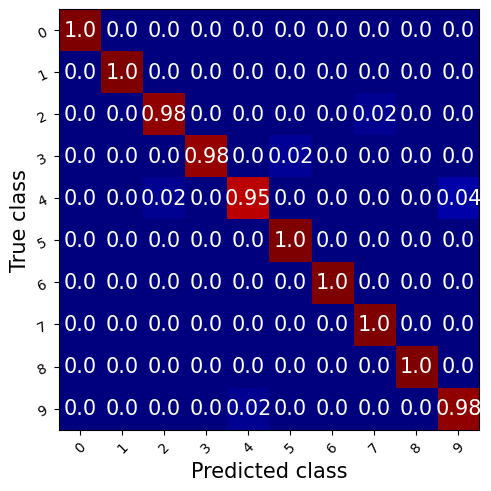

In [23]:
cm = torchmetrics.ConfusionMatrix(task = 'multiclass', num_classes = 10, normalize = 'true')
x = cm(torch.Tensor(result[:,1]), torch.Tensor(result[:,0]))
cm.plot(x, cmap = 'jet')

In [ ]:
#compute acc per class